# Bike Sharing Assignment

### Step 1: Importing the libraries

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split


### Step 2: Importing the data

In [164]:
input_data = pd.read_csv("day.csv")
input_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 3: Understanding the data 

In [165]:
# Finding out the number of rows and columns in the given dataset
input_data.shape

(730, 16)

#### We have 730 rows and 16 columns

In [166]:
# Understanding the datatypes and identifying if there are any null values (performing data cleaning)
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### We don't have any null values in the dataset.
#### Except for dteday rest all are either int or float.

In [206]:
input_data.describe()
# Noticed that there is one row with humidity value=0. Dropping this row.
input_data = input_data.drop(input_data[input_data['hum']==0.0].index)

### Step 3.1: Converting numeric values to categorical string values 

In [167]:
season_values = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
input_data = input_data.replace({"season": season_values})

weather_values = {1:'clear', 2:'mist', 3:'light snow', 4:'heavy rain'}
input_data = input_data.replace({"weathersit": weather_values})


### Step 3.2: Performing initial analysis on categorical variables and the effect on dependent variable

In [168]:
input_data['weathersit'].value_counts()


weathersit
clear         463
mist          246
light snow     21
Name: count, dtype: int64

In [169]:
input_data['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [194]:
input_data['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [187]:
# Understanding the cnt values by categories in season
grouped_sum = input_data.groupby('season')['cnt'].sum()
grouped_sum

season
fall      1061129
spring     469514
summer     918589
winter     841613
Name: cnt, dtype: int64

#### Count of total rental bikes is highest when season is fall

In [172]:
# Understanding the cnt values by categories in weathersit
grouped_sum = input_data.groupby('weathersit')['cnt'].sum()
grouped_sum

weathersit
clear         2257952
light snow      37869
mist           995024
Name: cnt, dtype: int64

#### Count of total rental bikes is highest when weather is clear

In [207]:
# Understanding the cnt values by categories in holiday
grouped_sum = input_data.groupby(['yr','holiday'])['cnt'].sum()
grouped_sum

yr  holiday
0   0          1212458
    1            30022
1   0          1999329
    1            48413
Name: cnt, dtype: int64

#### Count of total rental bikes is highest when it is not a holiday

In [199]:
# Understanding the cnt values by categories in month
grouped_sum = input_data.groupby('mnth')['cnt'].sum()
grouped_sum

mnth
1     2176.338710
2     2669.964286
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

#### Count of total rental bikes is highest when month is August (could also be related to the season)

In [175]:
# Understanding the cnt values by categories in weekday
grouped_sum = input_data.groupby('weekday')['cnt'].sum()
grouped_sum

weekday
0    444027
1    455503
2    469109
3    471214
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

#### Count of total rental bikes is increasing as the week progresses 

In [176]:
# Understanding the cnt values by categories in workingday
grouped_sum = input_data.groupby('workingday')['cnt'].sum()
grouped_sum

workingday
0    1000269
1    2290576
Name: cnt, dtype: int64

#### Count of total rental bikes is double on a working day compared to a holiday

In [204]:
# Understanding the cnt values by categories in weekday and working day
grouped_sum = input_data.groupby(['weekday', 'workingday'])['cnt'].sum()
grouped_sum

weekday  workingday
0        0             444027
1        0              59605
         1             395898
2        0               1013
         1             468096
3        0               7403
         1             463811
4        0               3920
         1             481475
5        0               6494
         1             481296
6        0             477807
Name: cnt, dtype: int64

#### Count of total rental bikes is higher on working day and especially higher if it is not a holiday

In [190]:
# Understanding the cnt values by categories in year
grouped_sum = input_data.groupby(['yr','mnth'])['cnt'].sum()
grouped_sum

yr  mnth
0   1        38189
    2        48215
    3        64045
    4        94870
    5       135821
    6       143512
    7       141341
    8       136691
    9       127418
    10      123511
    11      102167
    12       87323
1   1        96744
    2       101303
    3       164875
    4       174224
    5       195865
    6       202830
    7       203607
    8       214503
    9       218573
    10      198841
    11      152664
    12      123713
Name: cnt, dtype: int64

#### Count of total rental bikes has increased compared from 2018 to 2019

### Step 3.3: Deriving columns

In [117]:
input_data['wind_hum_ratio'] = input_data['windspeed']/input_data['hum']
input_data['atemp_hum_ratio'] = input_data['atemp']/input_data['hum']
input_data['cas_reg_ratio'] = input_data['casual']/input_data['registered']

In [118]:
input_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,wind_hum_ratio,atemp_hum_ratio,cas_reg_ratio
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0.133401,0.225621,0.506116
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0.239225,0.254091,0.195522
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.380465,0.216575,0.097640
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0.181897,0.179632,0.074278
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.286580,0.262348,0.054018


### Step 3.4: Building dummy variables

In [119]:
# Since season has 4 values, we can convert them to 4 columns. We can also remove the first column as we can derive that from the other three columns.
season_columns = pd.get_dummies(input_data['season'], drop_first = True)
input_data = pd.concat([input_data,season_columns], axis = 1)

# Following same approach for weathersit column.
weather_columns = pd.get_dummies(input_data['weathersit'], drop_first = True)
input_data = pd.concat([input_data, weather_columns], axis = 1)


In [120]:
input_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,wind_hum_ratio,atemp_hum_ratio,cas_reg_ratio,spring,summer,winter,light snow,mist
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,...,654,985,0.133401,0.225621,0.506116,True,False,False,False,True
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,...,670,801,0.239225,0.254091,0.195522,True,False,False,False,True
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,...,1229,1349,0.380465,0.216575,0.097640,True,False,False,False,False
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,...,1454,1562,0.181897,0.179632,0.074278,True,False,False,False,False
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,...,1518,1600,0.286580,0.262348,0.054018,True,False,False,False,False


In [121]:
# Once we have created the dummy variables, we can drop the parent columns i.e. season and weathersit
input_data.drop(['season'], axis = 1, inplace = True)
input_data.drop(['weathersit'], axis = 1, inplace = True)

In [122]:
input_data.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,registered,cnt,wind_hum_ratio,atemp_hum_ratio,cas_reg_ratio,spring,summer,winter,light snow,mist
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,...,654,985,0.133401,0.225621,0.506116,True,False,False,False,True
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,...,670,801,0.239225,0.254091,0.195522,True,False,False,False,True
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,...,1229,1349,0.380465,0.216575,0.097640,True,False,False,False,False
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,...,1454,1562,0.181897,0.179632,0.074278,True,False,False,False,False
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,...,1518,1600,0.286580,0.262348,0.054018,True,False,False,False,False


In [123]:
input_data['mnth'].value_counts()

mnth
1     62
8     62
7     62
5     62
12    62
10    62
3     61
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64

In [124]:
# Let us create dummy variables for the month and weekday columns

input_data['mnth'] = input_data['mnth'].astype('category')
input_data['weekday'] = input_data['weekday'].astype('category')

month_columns = pd.get_dummies(input_data['mnth'], prefix = 'mnth_', drop_first = True)
input_data = pd.concat([input_data, month_columns], axis = 1)

weekday_columns = pd.get_dummies(input_data['weekday'], prefix = 'weekday_', drop_first = True)
input_data = pd.concat([input_data, weekday_columns], axis = 1)

input_data.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,mnth__9,mnth__10,mnth__11,mnth__12,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,...,False,False,False,False,False,False,False,False,False,True
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,...,False,False,False,False,False,False,False,False,False,False
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,False,False,False
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,...,False,False,False,False,False,True,False,False,False,False
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,True,False,False,False


### Step 3.5: Deriving columns

In [125]:
# Dropping unnecessary columns
input_data.drop(['dteday'], axis = 1, inplace = True)
input_data.drop(['instant'], axis = 1, inplace = True)
input_data.drop(['weekday'], axis = 1, inplace = True)
input_data.drop(['mnth'], axis = 1, inplace = True)

# We can also drop the casual and registered columns

input_data.drop(['casual'], axis = 1, inplace = True)
input_data.drop(['registered'], axis = 1, inplace = True)


In [ ]:
#### Since cnt is our target variable, we will move it to the first column so that we can check for the correlation between other columns

In [126]:
first_column = input_data.pop('cnt')
input_data.insert(0,'cnt', first_column)

In [208]:
#input_data.info()

### Step 4: Performing EDA via visualizations

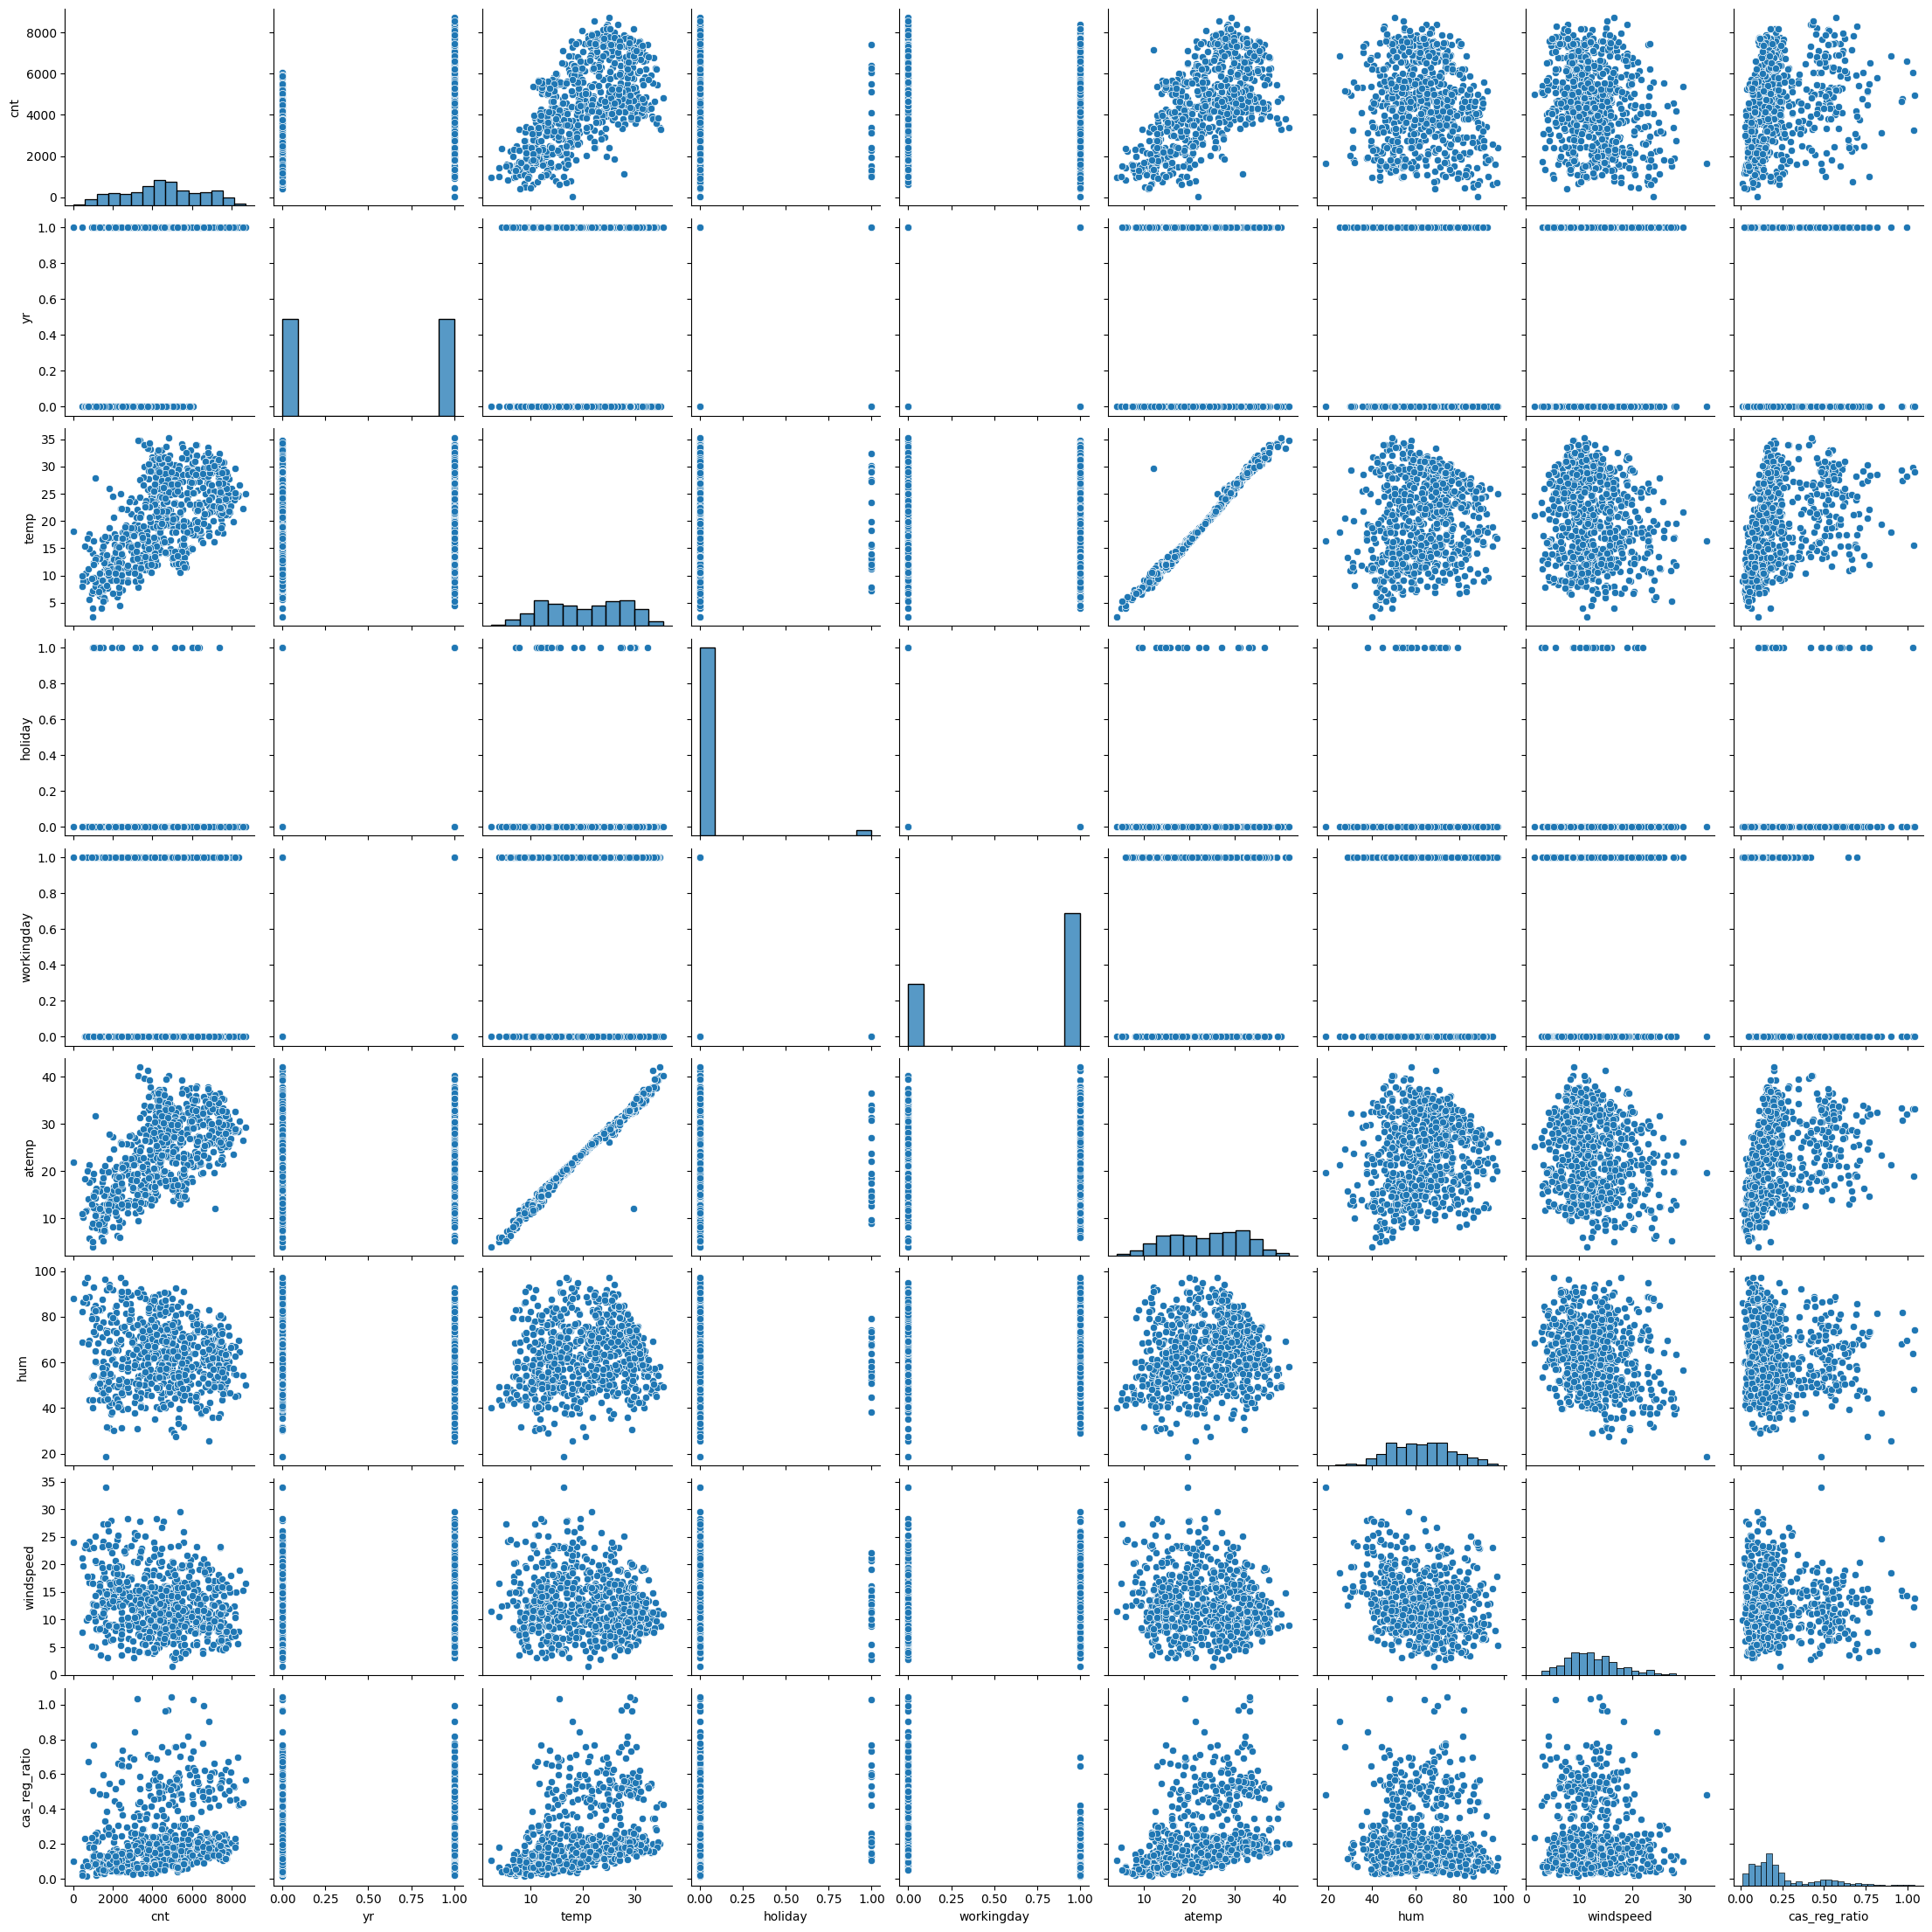

In [128]:
num_vars = input_data[['cnt', 'yr', 'temp', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cas_reg_ratio']]

sns.pairplot(num_vars)
plt.show()

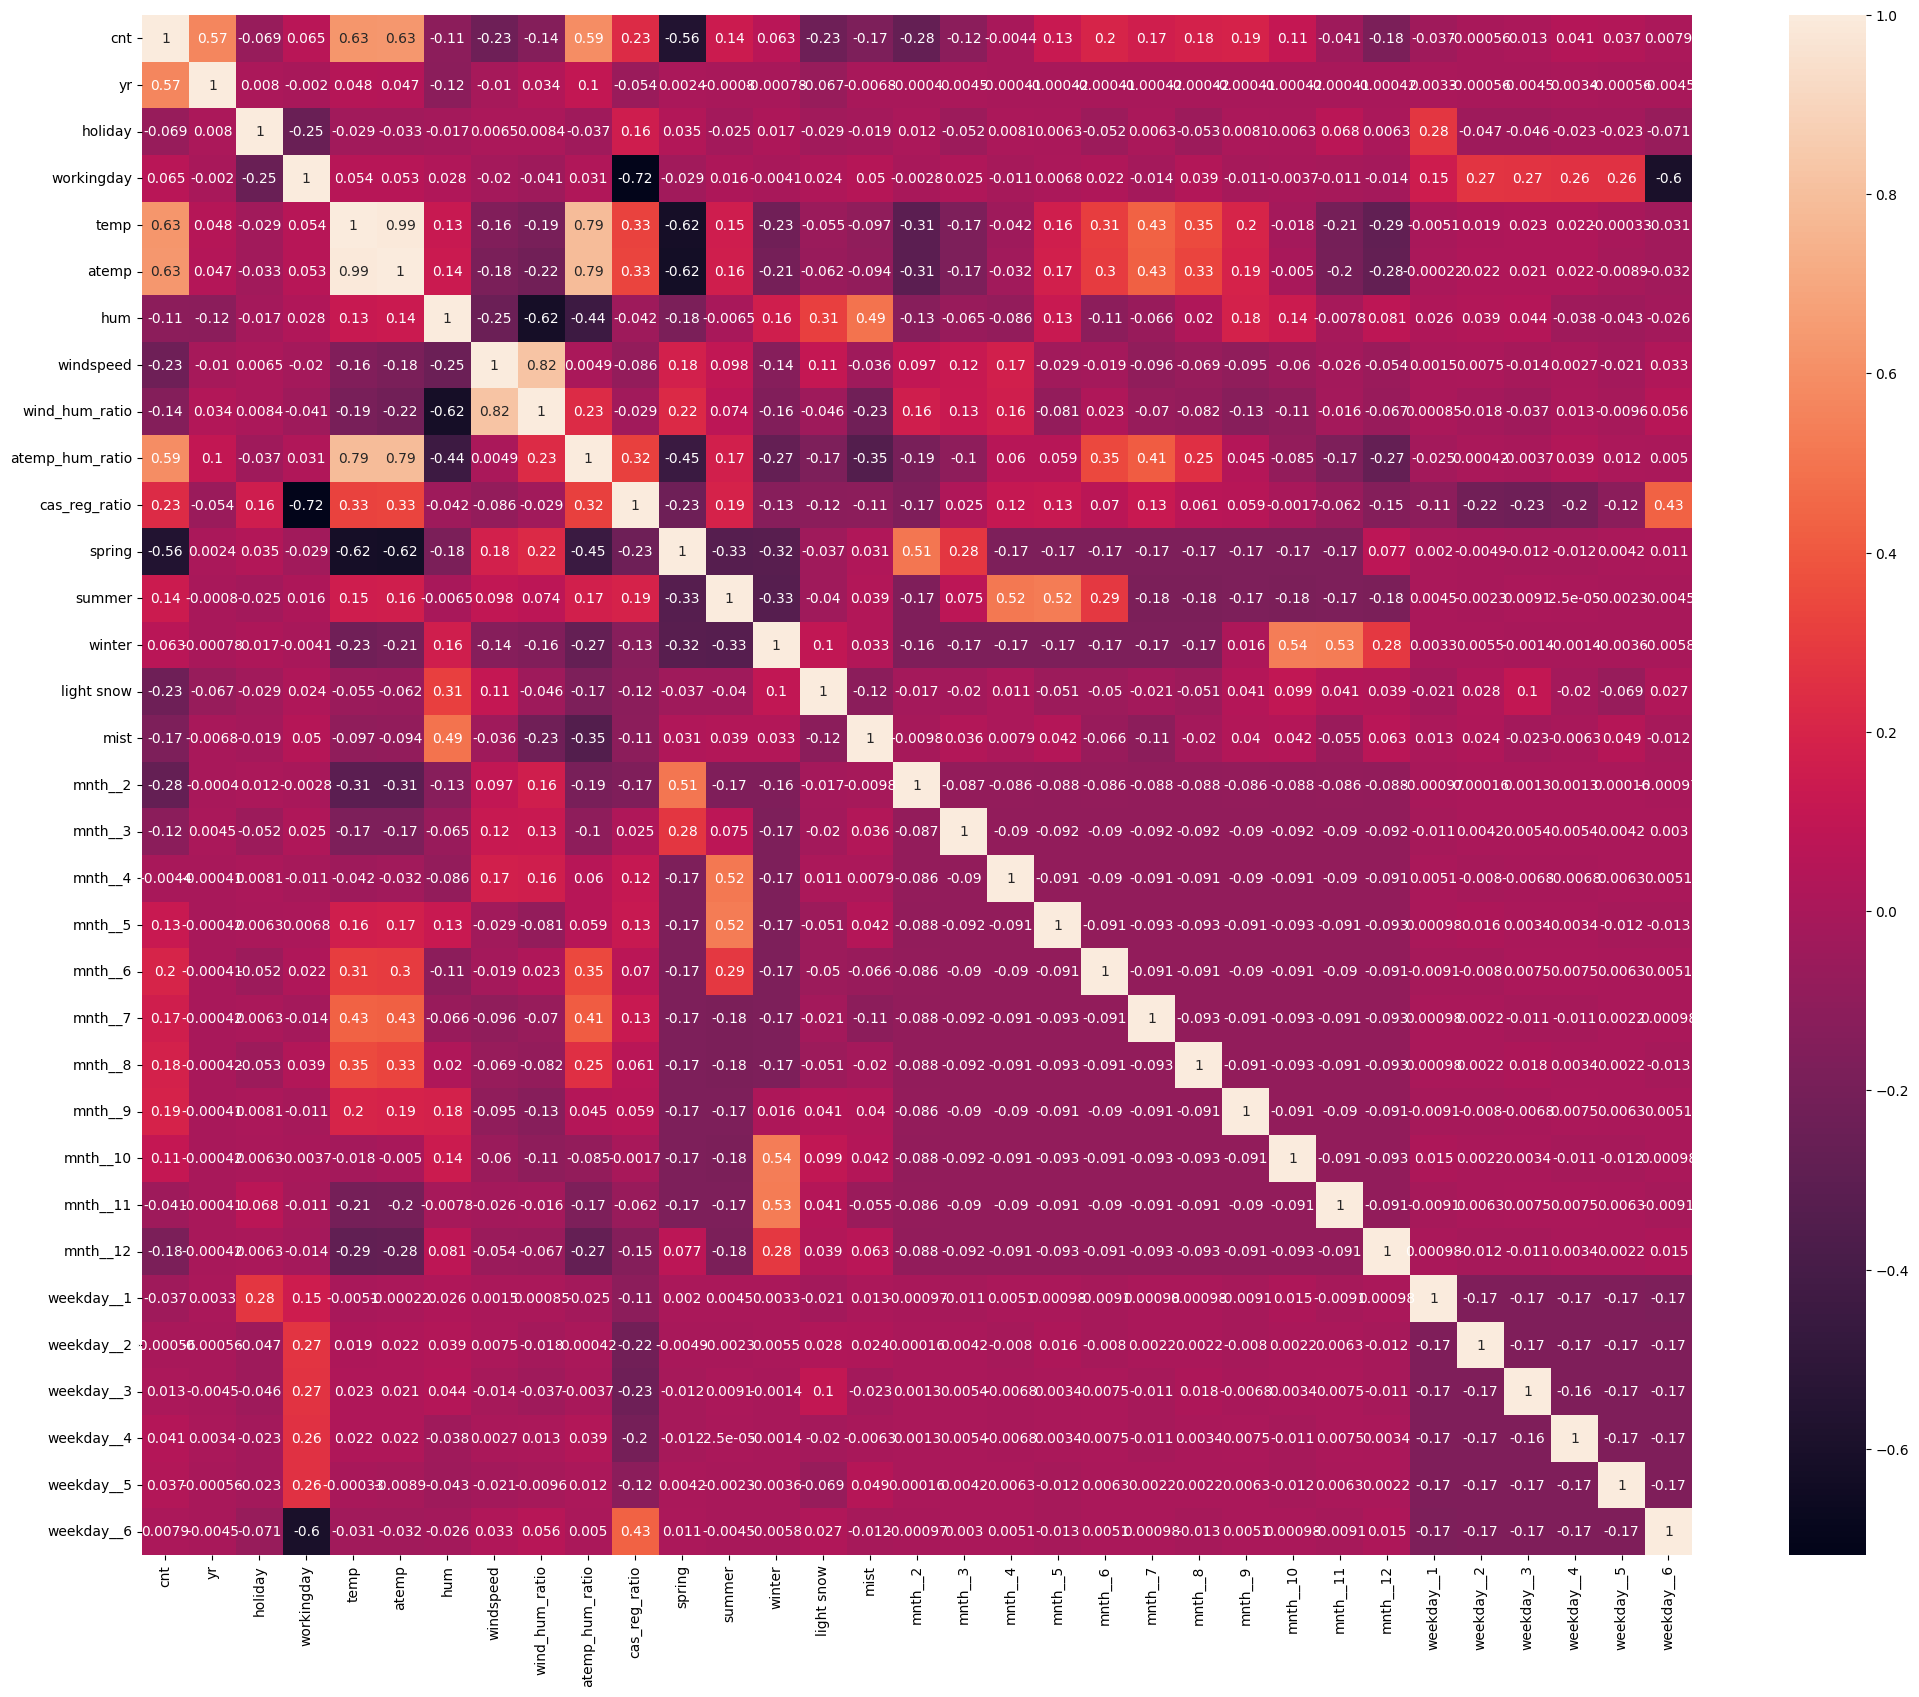

In [129]:
plt.figure(figsize = (25, 20))
sns.heatmap(input_data.corr(), annot=True)
plt.show()

#### From above 2 visualizations, it is clear that cnt has a linear relation and strong correlation with temp and atemp

### Step 5: Splitting into train and test datasets

In [131]:
df_train, df_test = train_test_split(input_data, train_size = 0.7, random_state = 100)

### Step 6: Scaling the variables

In [132]:
# We will use Min Max Scaling to take care of outliers

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [133]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'wind_hum_ratio', 'atemp_hum_ratio', 'cas_reg_ratio']

#num_vars = ['casual','registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [134]:
df_train.describe()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,wind_hum_ratio,atemp_hum_ratio,cas_reg_ratio
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496352,0.511765,0.027451,0.674510,0.540678,0.541209,0.571669,0.318011,0.103599,0.303844,0.219452
std,0.235715,0.500352,0.163554,0.469018,0.225277,0.221255,0.182541,0.170567,0.080652,0.166081,0.187982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333213,0.000000,0.000000,0.000000,0.350497,0.357237,0.431818,0.192829,0.053526,0.179810,0.094739
50%,0.498008,1.000000,0.000000,1.000000,0.540519,0.552927,0.575578,0.296767,0.083423,0.278454,0.156686
75%,0.685832,1.000000,0.000000,1.000000,0.742223,0.731274,0.704680,0.414082,0.134698,0.399249,0.266486
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


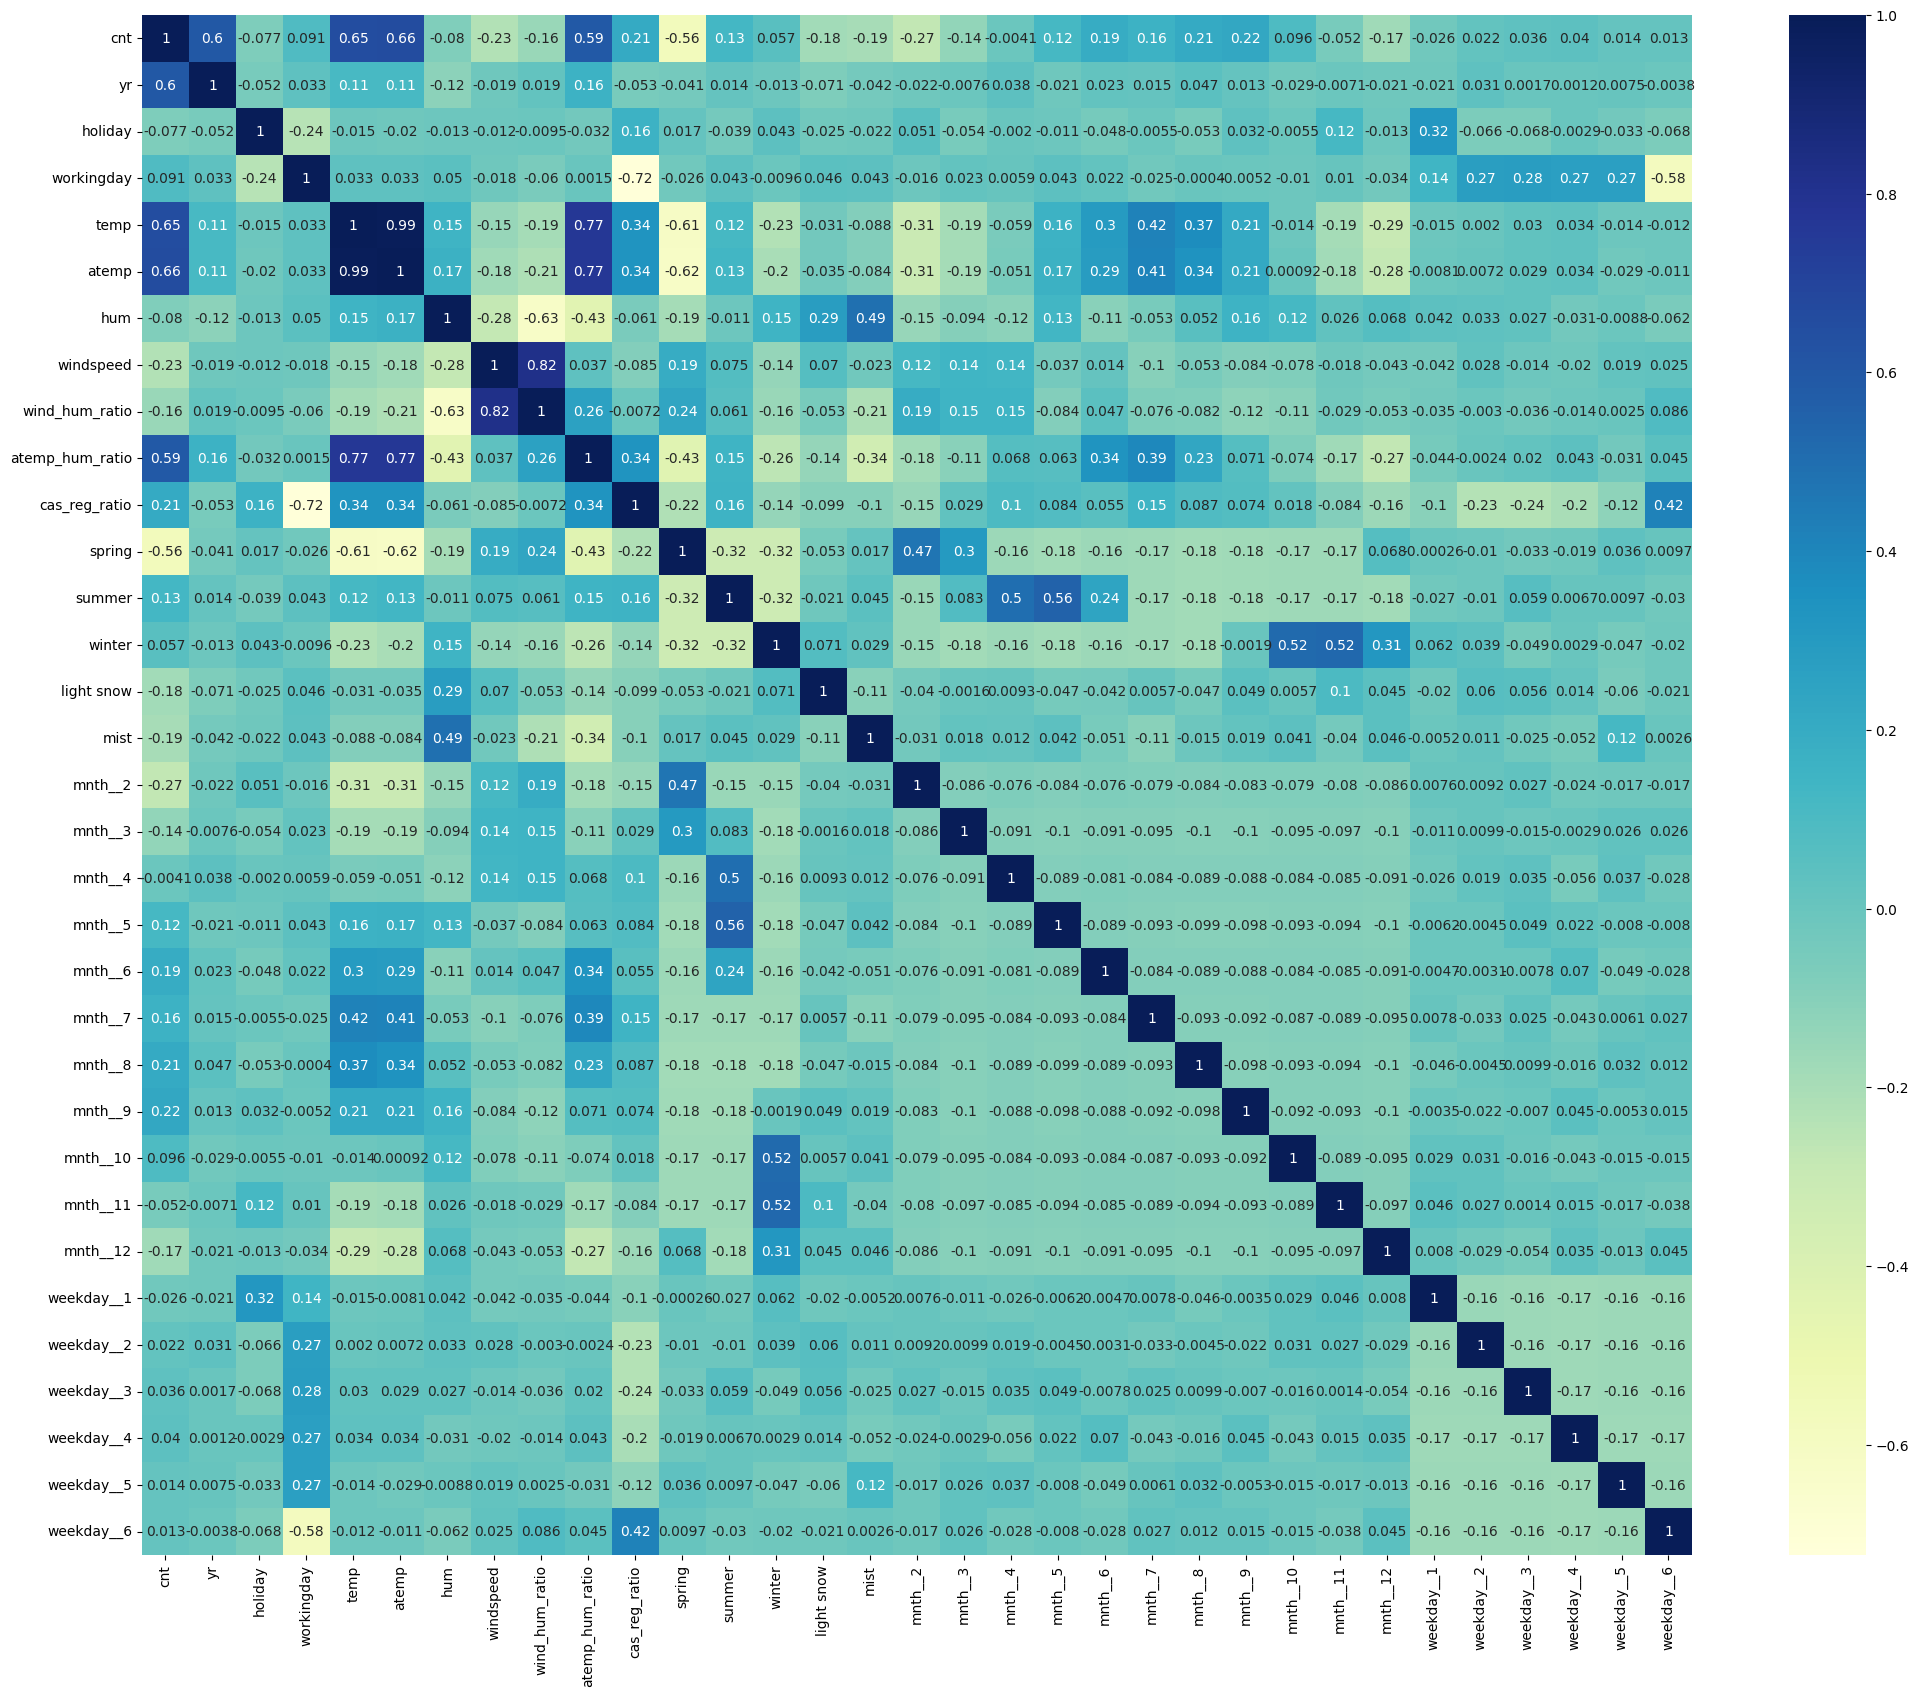

In [135]:
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 7: Train the model

In [136]:
y_train = df_train.pop('cnt')
X_train = df_train

In [137]:
# We will use RFE to build our Linear Regression Model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [138]:
Lm = LinearRegression()
Lm.fit(X_train, y_train)

LinearRegression()

In [139]:
# Performing Recursive Feature Elimination considering 10 features to begin with
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.False_, np.int64(12)),
 ('workingday', np.False_, np.int64(2)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('wind_hum_ratio', np.False_, np.int64(5)),
 ('atemp_hum_ratio', np.True_, np.int64(1)),
 ('cas_reg_ratio', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.False_, np.int64(20)),
 ('winter', np.False_, np.int64(3)),
 ('light snow', np.True_, np.int64(1)),
 ('mist', np.False_, np.int64(7)),
 ('mnth__2', np.False_, np.int64(16)),
 ('mnth__3', np.False_, np.int64(11)),
 ('mnth__4', np.False_, np.int64(15)),
 ('mnth__5', np.False_, np.int64(9)),
 ('mnth__6', np.False_, np.int64(13)),
 ('mnth__7', np.True_, np.int64(1)),
 ('mnth__8', np.False_, np.int64(14)),
 ('mnth__9', np.False_, np.int64(4)),
 ('mnth__10', np.False_, np.int64(19)),
 ('mnth__11', np.False_, np.int64(8)),
 ('mnth__12', np.False_, np.int64(10)),
 

In [141]:
# Considering only the 10 columns that have high support values
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.columns

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'atemp_hum_ratio',
       'cas_reg_ratio', 'spring', 'light snow', 'mnth__7'],
      dtype='object')

In [142]:
# We need to add a constant as it is not available by default in statsmodels
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe.astype(float)).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     224.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.36e-177
Time:                        22:03:54   Log-Likelihood:                 448.06
No. Observations:                 510   AIC:                            -874.1
Df Residuals:                     499   BIC:                            -827.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3823      0.036     

#### Model 2: Rebuilding the model without considering cas_reg_ratio as its p-value is very high

In [143]:
X_train_new = X_train_rfe.drop(['cas_reg_ratio'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.45e-178
Time:                        22:03:54   Log-Likelihood:                 448.06
No. Observations:                 510   AIC:                            -876.1
Df Residuals:                     500   BIC:                            -833.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3826      0.036     

#### Model 3: Rebuilding the model without considering atemp_hum_ratio as its p-value is very high

In [144]:
X_train_new2 = X_train_new.drop(['atemp_hum_ratio'], axis = 1)
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train, X_train_lm.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     278.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.97e-179
Time:                        22:03:54   Log-Likelihood:                 446.25
No. Observations:                 510   AIC:                            -874.5
Df Residuals:                     501   BIC:                            -836.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3362      0.026     12.762      0.0

#### Model 4: Rebuilding the model without considering atemp as its p-value is very high

In [145]:
X_train_new3 = X_train_new2.drop(['atemp'], axis = 1)
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train, X_train_lm.astype(float)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     316.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.24e-179
Time:                        22:03:54   Log-Likelihood:                 444.69
No. Observations:                 510   AIC:                            -873.4
Df Residuals:                     502   BIC:                            -839.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3428      0.026     13.124      0.0

In [ ]:
#### Since p values are all around 0, we can now calculate the VIF values for the new model (Model 4)

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3.astype(float)
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,33.46
2,temp,2.00
5,spring,1.68
3,hum,1.29
7,mnth__7,1.28
4,windspeed,1.16
6,light snow,1.14
1,yr,1.04


#### Since all the variables have VIF less than 5 and the P values are ~0, we can consider this model.
#### Let us find out the coefficients

In [147]:
lm.params

const         0.342827
yr            0.238126
temp          0.497020
hum          -0.215334
windspeed    -0.205492
spring       -0.153454
light snow   -0.144845
mnth__7      -0.101805
dtype: float64

### Step 8: Hypothesis Testing

### Since none of the coefficients are equal to 0, we can reject the null hypothesis

### Step 9: Residual Analysis
### We need to check if the error terms are normally distributed around 0

In [148]:
y_train_cnt = lm.predict(X_train_new3)

C:\Users\KARRISU2\AppData\Local\Temp\ipykernel_544\3665454312.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_train_cnt) , bins =20)


Text(0.5, 0, 'Errors')

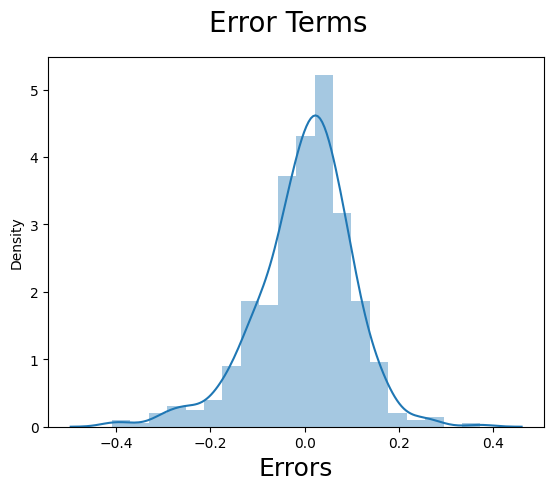

In [149]:
fig = plt.figure()
sns.distplot((y_train-y_train_cnt) , bins =20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### We can notice that the residuals are normally distributed around 0.

### Step 9: Predicting the test model

In [151]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'wind_hum_ratio', 'atemp_hum_ratio', 'cas_reg_ratio']

#num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'wind_hum_ratio', 'atemp_hum_ratio', 'cas_reg_ratio']


#df_train[num_vars] = scaler.transform(df_train[num_vars])

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [152]:
    df_test.describe()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,wind_hum_ratio,atemp_hum_ratio,cas_reg_ratio
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.484718,0.474886,0.031963,0.703196,0.551850,0.553801,0.562174,0.319257,0.102863,0.316668,0.215840
std,0.227716,0.500513,0.176306,0.457896,0.235346,0.232749,0.179169,0.157824,0.066045,0.170990,0.180866
min,-0.049378,0.000000,0.000000,0.000000,0.046591,0.027237,0.131791,-0.042808,-0.009432,0.006638,0.011561
25%,0.330677,0.000000,0.000000,0.000000,0.336479,0.345502,0.427649,0.213225,0.062601,0.182376,0.093880
50%,0.497042,0.000000,0.000000,1.000000,0.561806,0.576424,0.548144,0.303481,0.092656,0.308674,0.161422
75%,0.635156,1.000000,0.000000,1.000000,0.746636,0.729541,0.689408,0.400400,0.126387,0.447783,0.235679
max,0.941205,1.000000,1.000000,1.000000,0.983385,1.049574,1.012910,0.807474,0.405070,0.763014,0.927853


In [153]:
# Create X and Y variables
y_test = df_test.pop('cnt')
X_test = df_test

In [154]:
X_test = X_test[['yr', 'temp', 'hum', 'windspeed', 'spring', 'light snow', 'mnth__7']]
X_test_new1 = sm.add_constant(X_test)

In [155]:
y_pred = lm.predict(X_test_new1)

### Step 10: Model Evaluation

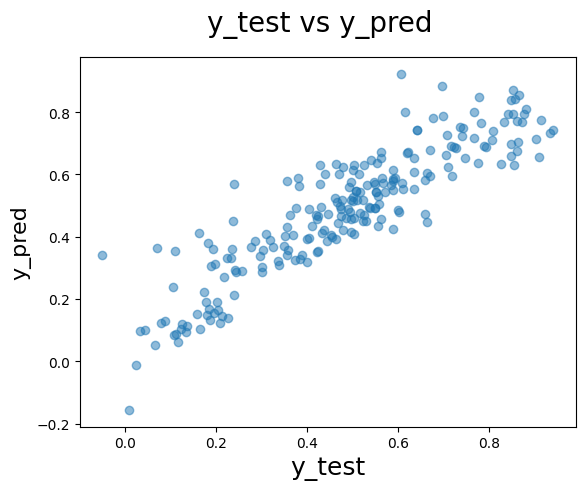

In [156]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [157]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.7978844408701193


In [158]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 -((1-r2)*(n-1)/(n-p-1))
print (adjusted_r2)

0.7911791853539621


In [159]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     316.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.24e-179
Time:                        22:04:20   Log-Likelihood:                 444.69
No. Observations:                 510   AIC:                            -873.4
Df Residuals:                     502   BIC:                            -839.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3428      0.026     13.124      0.000       0.292       0.394
yr             0.2381      0.009     25.865      0.000       0.220       0.256
temp           0.4970      0.028     17.536      0.000       0.441       0.553
hum           -0.2153      0.028     -7.670      0.000      -0.270      -0.160
windspeed     -0.2055      0.029     -7.208      0.000      -0.262      -0.149
spring        -0.1535      0.014    -11.253      0.000      -0.180      -0.127
light snow    -0.1448      0.033     -4.368      0.000      -0.210      -0.080
mnth__7       -0.1018      0.019     -5.424      0.000      -0.139      -0.065
==============================================================================
Omnibus:                       50.820   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.044
Skew:                          -0.623   Prob(JB):                     1.70e-20
Kurtosis:                       4.653   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""